In [0]:
#1
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

import twitter_credentials

#2
from tweepy import API, Cursor

#3
import pandas as pd
import numpy as np

#4
import matplotlib.pyplot as plt

#5
from textblob import TextBlob
import re
import json

In [0]:
class TwitterListener(StreamListener):
  # Listener class to print tweets
  def __init__(self, tweet_file):
    self.tweet_file=tweet_file

  def on_data(self,data):
    try:
      print(data)


    except BaseException as e:
      print('Error: {}'.format(e))
    return True

  def on_error(self,status):
    if status == 420:
      # If rate limit exceeds, cancel tweet extraction.
      return False
    print(status)

In [0]:
class TwitterAuthenticator():
  
  def authenticate_twitter(self):
    auth = OAuthHandler(twitter_credentials.CONSUMER_KEY,twitter_credentials.CONSUMER_SECRET)
    auth.set_access_token(twitter_credentials.ACCESS_TOKEN,twitter_credentials.ACCESS_TOKEN_SECRET)
    return auth

In [0]:
class TwitterStreamer():
  # Streaming and processing live tweets
  def __init__(self):
    self.twitter_auth=TwitterAuthenticator()

  def stream_tweets(self, tweet_file, hash_tag_list):
    # Authentication and API connection
    listener = TwitterListener(tweet_file)
    auth=self.twitter_auth.authenticate_twitter()
    stream = Stream(auth,listener)

    stream.filter(track=hash_tag_list,languages=['en']) 

In [0]:
def clean_data(data):
  import json
  o=json.dumps(data)
  x=json.loads(data)

  text=x['text']

  texts = remove_stopwords(text)
  print(texts)

def remove_stopwords(text):
    import nltk
    nltk.download('punkt')

    stoplist = [word.replace("\n","") for word in open('englishstop.txt')]
    texts = [word for word in nltk.word_tokenize(text.lower()) if word not in stoplist and word.isalpha()]

    return texts



In [0]:
hash_tags=['coronavirus','covid19']
tweet_file = 'tweets.json'

twitter_streamer = TwitterStreamer()
twitter_streamer.stream_tweets(tweet_file=tweet_file,hash_tag_list=hash_tags)

{"created_at":"Thu Mar 12 08:15:25 +0000 2020","id":1238015727338020865,"id_str":"1238015727338020865","text":"RT @business: Coronavirus latest: \n\n\u2022 125,326 confirmed cases\n\u2022 4,625 deaths worldwide\n\u2022 CDC raises Europe travel warning\n\u2022 Greece reports\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/iphone\" rel=\"nofollow\"\u003eTwitter for iPhone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":36959561,"id_str":"36959561","name":"Jason Gale","screen_name":"jwgale","location":"Melbourne, Australia ","url":null,"description":null,"translator_type":"none","protected":false,"verified":true,"followers_count":5914,"friends_count":3389,"listed_count":190,"favourites_count":7452,"statuses_count":9978,"created_at":"Fri May 01 14:58:32 +0000 2009","utc_offset":null,"time_zone":null,"geo_enabled":true,"lang":n

KeyboardInterrupt: ignored

In [0]:
def semantic_preprocess():
  
  semantic_dictionary = dict()
  line_num=0

  for line in open('NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt'):
    if line_num>2:
      words=line.split('\t')
      if words[0] not in semantic_dictionary.keys():
        semantic_dictionary[words[0]] = {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust':0 }
      semantic_dictionary[words[0]][words[1]] = int(words[2])

    line_num+=1
    
  return semantic_dictionary

# import json
# # print(semantic_preprocess())
# with open('semantic_dict.json','w') as f:
#   x=json.dumps(semantic_preprocess())
#   f.write(x)
# # y=json.loads(x)



In [0]:
# # !pip install gensim
# from gensim import corpora, models, similarities

# def get_LDAasJSON(texts):
#     # Make dictionary
#     dictionary = corpora.Dictionary(texts)
#     #dictionary.save('test.dict') # store the dictionary, for future reference

#     #Create and save corpus
#     corpus = [dictionary.doc2bow(texts)]
#     #corpora.MmCorpus.serialize('test.mm', corpus) # store to disk, for later use

#     #Run LDA
#     model = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=20)
#     #Save Model
#     #model.save('ldamodel.m')

#     tmp = model.show_topics(num_topics=20, num_words=5, log=False, formatted=False)

#     #print tmp
#     json_tm = json.dumps(tmp)

#     return json_tm

# print(get_LDAasJSON(clean_data('{"text":"hello, how are you. you fucking whore"}')))

In [0]:
!pip install word2vec

In [0]:
import codecs,glob,multiprocessing,os,pprint,re,nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
import seaborn as sns

In [0]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
def clean_model(text):
  texts = remove_stopwords(text)
  print(texts)
  return texts

def remove_stopwords(text):
    import nltk
    nltk.download('punkt')

    stoplist = [word.replace("\n","") for word in open('englishstop.txt')]
    texts = [word for word in nltk.word_tokenize(text.lower()) if word not in stoplist and word.isalpha()]

    return texts

In [0]:
df1=pd.read_csv('impermium_verification_labels.csv')
df2=pd.read_csv('test_with_solutions.csv')
# df3=pd.read_csv('train.csv')
# df4=pd.read_csv('train1.csv')
df4=pd.read_csv('text_emotion.csv')

# df1=df1.drop(columns=['id','Insult','Date','Usage'])
# df2=df2.drop(columns=['Date','Usage','Insult'])
# df3=df3.drop(columns=['Date','Insult'])
# df4=df4[['comment_text']].rename(columns={"comment_text":'Comment'})
df4=df4.drop(columns=['tweet_id','sentiment','author']).rename(columns={"content":'Comment'})
df4.head()

,Comment
0,@tiffanylue i know i was listenin to bad habi...
1,Layin n bed with a headache ughhhh...waitin o...
2,Funeral ceremony...gloomy friday...
3,wants to hang out with friends SOON!
4,@dannycastillo We want to trade with someone w...


In [0]:
# df=pd.concat([df1,df2,df3,df4])
df=pd.concat([df4,df1,df2])

corpus_raw= u""

for data in df['Comment']:
  corpus_raw+=data

len(corpus_raw)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


3708274

In [0]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

raw_sentences = tokenizer.tokenize(corpus_raw)

def sentence_to_wordlist(raw):
  clean=re.sub('[^a-zA-Z]'," ",raw)
  words = clean.split()
  return words


sentences=[]

for raw_sentence in raw_sentences:
  if len(raw_sentence)>0:
    sentences.append(sentence_to_wordlist(raw_sentence))

token_count=sum(len(sentence) for sentence in sentences)
token_count

684190

In [0]:
num_features=300

min_word_count=3

num_workers=multiprocessing.cpu_count()

context_size=7

downsampling = 1e-3

seed=1

In [0]:
bully2vec=w2v.Word2Vec(sg=1,
                       seed=seed,
                       workers=num_workers,
                       size=num_features,
                       min_count=min_word_count,
                       window=context_size,
                       sample=downsampling)


bully2vec.build_vocab(sentences)

len(bully2vec.wv.vocab)
bully2vec.train(sentences,total_examples=len(sentences),epochs=5)

(2428339, 3420950)

In [0]:
if not os.path.exists("trained"):
    os.makedirs("trained")

bully2vec.save(os.path.join("trained", "bully2vec.w2v"))

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
bully2vec.load(os.path.join("trained", "bully2vec.w2v"))
tsne = sklearn.manifold.TSNE(n_components=2,random_state=0)
word_vector_matrix=bully2vec.trainables.syn1neg
# word_vector_matrix.shape
word_vector_matrix_2d=tsne.fit_transform(word_vector_matrix)

In [0]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, word_vector_matrix_2d[bully2vec.wv.vocab[word].index])
            for word in bully2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [0]:
points.head(10)

,word,x,y
0,i,-27.392633,44.009884
1,know,-35.657314,34.567638
2,was,-9.620327,55.396183
3,listenin,3.010911,-13.476866
4,to,-31.028776,47.472202
5,bad,-16.718817,48.237324
6,habit,-19.069853,28.470762
7,earlier,-4.934456,53.111656
8,and,16.418650,53.120129
9,started,0.306972,55.178886


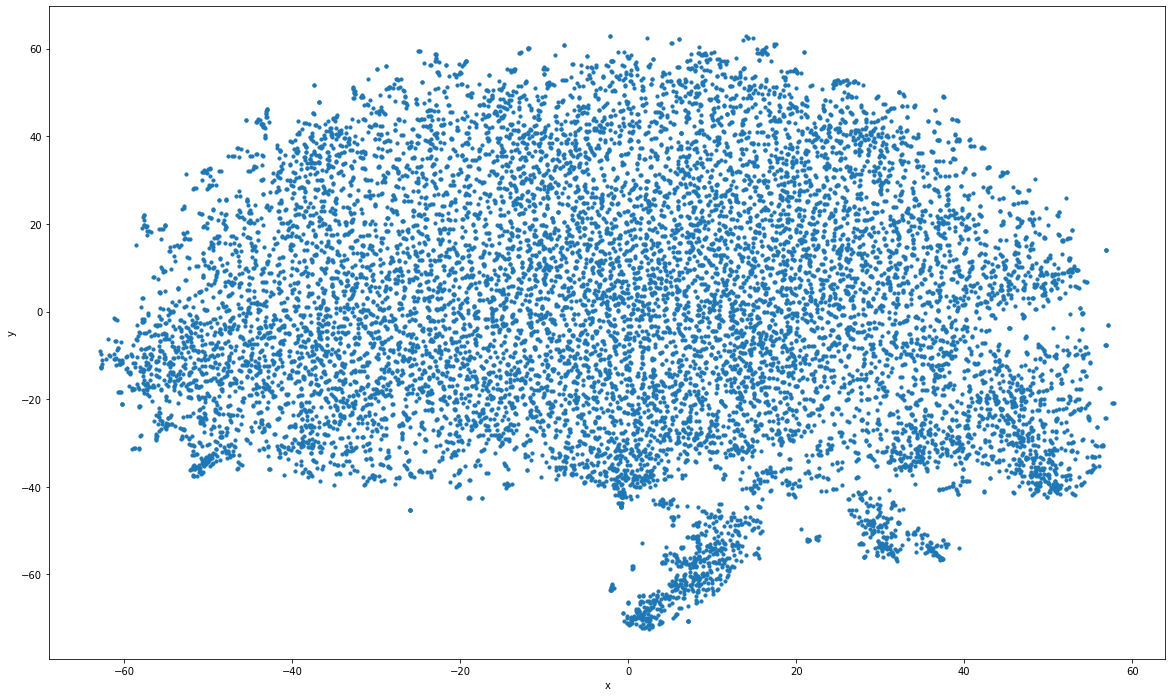

In [0]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [0]:
bully_words=[]
for f in open('bully_words.txt','r'):
  bully_words.append(f.replace("\n",""))

bully_word = bully_words[1:]

In [0]:
def analyse(text):
  score=0
  text=re.sub('[^a-zA-Z]'," ",text)
  li=text.split()
  for item in li:
    compare_list=[]
    try:
      x= bully2vec.wv.most_similar(item)
      for m in x:
        compare_list.append(m[0])
    except:
      pass
    finally:
      compare_list.append(item)
      score+=calculate(compare_list)
  score = (score/(len(li)*121))
  # print('\n\nScore: ',score)
  return score

def calculate(text_list):
  bully_points=0
  semantic_points=0
  textblob_points=0

  textblob_points+=(TextBlob(' '.join(map(str,text_list))).sentiment.polarity*-5)
  # print(TextBlob(' '.join(map(str,text_list))).sentiment)
  for word in text_list:
    semantic_points=semantics(word)

    if word in bully_words:
      bully_points+=5
  # print('Semantic Points: ',semantic_points,'\nBully Points: ',bully_points,'\n')
  # print(semantic_points)
  return bully_points+semantic_points+textblob_points

In [0]:
sema_dict=semantic_preprocess()

def semantics(word):
  semantic_points=0
  if word in sema_dict.keys():
    semantic_points+=(sema_dict[word]['anger']+sema_dict[word]['anticipation']+sema_dict[word]['disgust']+sema_dict[word]['fear']+sema_dict[word]['negative']+sema_dict[word]['sadness'])
    semantic_points-=(sema_dict[word]['joy']+sema_dict[word]['positive']+sema_dict[word]['surprise']+sema_dict[word]['trust'])
  return semantic_points

sema_dict['aback'].keys()

dict_keys(['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust'])

In [0]:
def bully_analyser(text):
  if calc_points(text) > 0.25:
    print('\n*********************\nBULLY\n*********************\n')
  else:
    print('\n*********************\nNOT A BULLY\n*********************\n')



text = 'you are worthless'
bully_analyser(text)

text="you are a good person"
bully_analyser(text)

text="I cannot talk in a bad tone"
bully_analyser(text)

text="you are a bad person"
bully_analyser(text)

text="i dont like Meghan markle because she is a blue star daughter"
bully_analyser(text)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.26859504132231404

*********************
BULLY
*********************

0.20423687882365568

*********************
NOT A BULLY
*********************

0.08613980716253446

*********************
NOT A BULLY
*********************

0.5061676013380558

*********************
BULLY
*********************

1.991202014239204

*********************
BULLY
*********************



In [0]:
from textblob import TextBlob
 
# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = TextBlob(data).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]

extract_ngrams(text,3)

['i can sense',
 'can sense something',
 'sense something dumb',
 'something dumb here']

In [0]:
def calc_points(text):
  addpoints=0

  count=0
  # text='nobody likes you'
  for i in range(1,len(text.split())):
    n=extract_ngrams(text,i)
    count+=len(n)*i
    for x in n:
      addpoints+=analyse(x)
  print(addpoints)
  return addpoints



0.49793388429752067


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.49793388429752067